# 01.01 - PROYECTO KAGGLE

In [22]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [23]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 94% 19.0M/20.1M [00:00<00:00, 100MB/s] 
100% 20.1M/20.1M [00:00<00:00, 91.1MB/s]


## unzip and inspect data

In [24]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Cuenta numero de lineas que tiene el fichero

In [25]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



Carga en memoria el fichero de entrenamiento

In [26]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [27]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Se toman las columnas que se van a entrenar

In [28]:
z = z[['ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET', 'RENDIMIENTO_GLOBAL']]
z.head()

,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,BOGOTÁ,Postgrado,Técnica o tecnológica incompleta,Entre 5.5 millones y menos de 7 millones,Estrato 3,Menos de 10 horas,Si,medio-alto
1,ATLANTICO,Técnica o tecnológica incompleta,Técnica o tecnológica completa,Entre 2.5 millones y menos de 4 millones,Estrato 3,0,No,bajo
2,BOGOTÁ,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,Estrato 3,Más de 30 horas,Si,bajo
3,SANTANDER,Secundaria (Bachillerato) completa,No sabe,Entre 4 millones y menos de 5.5 millones,Estrato 4,0,Si,alto
4,ANTIOQUIA,Primaria completa,Primaria completa,Entre 2.5 millones y menos de 4 millones,Estrato 3,Entre 21 y 30 horas,Si,medio-bajo


## we will do a model using only two columns

- we have to predict column `RENDIMIENTO_GLOBAL` using the rest

- we will use columns
  - `FAMI_EDUCACIONMADRE` which we will need to convert to a **onehot encoding**
  - `ESTU_VALORMATRICULAUNIVERSIDAD` which we will need to convert to a **continuous encoding**

Se toman las columnas que se van a entrenar

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

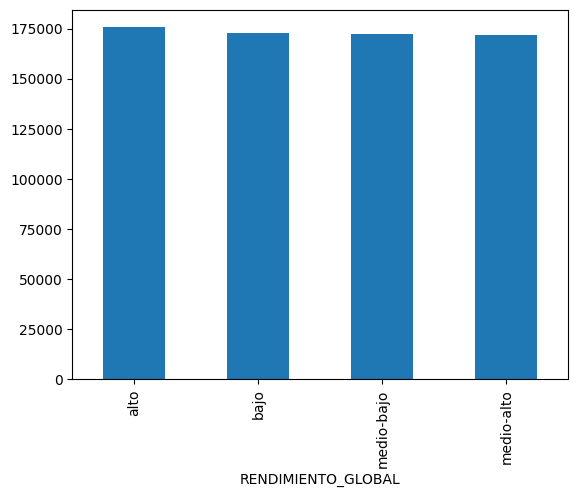

In [ ]:
z.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

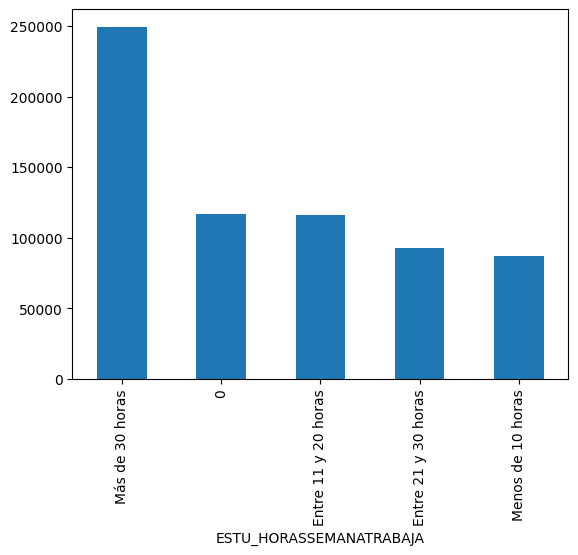

In [ ]:
z.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

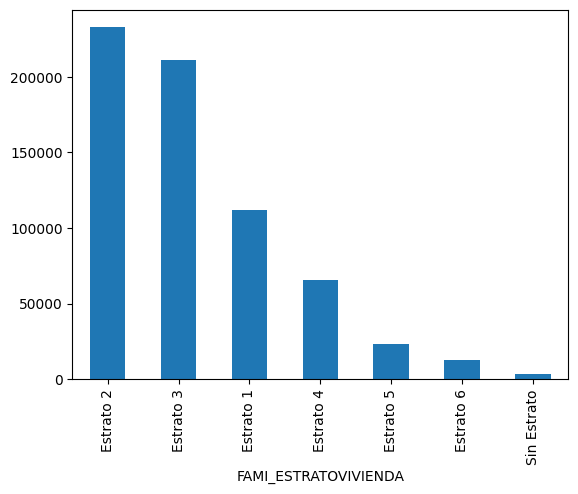

In [ ]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

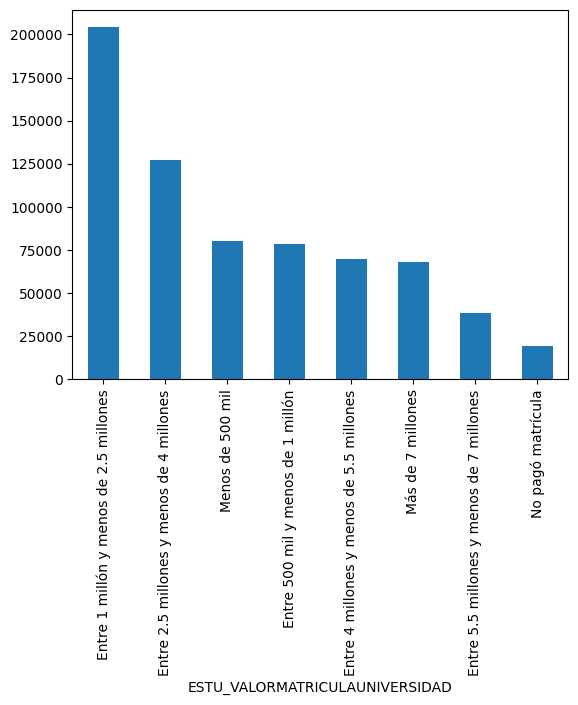

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

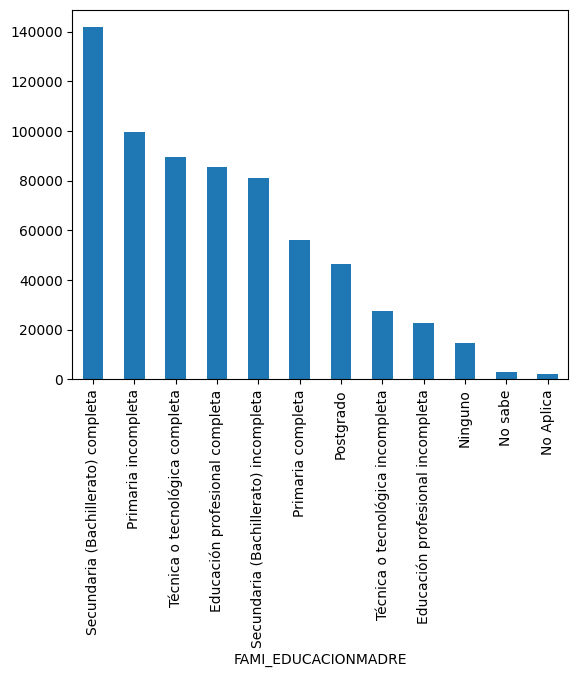

In [ ]:
z.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONPADRE'>

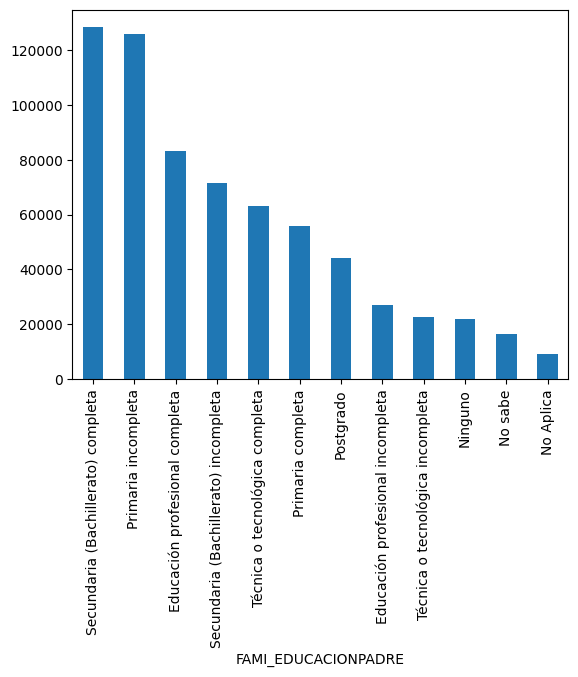

In [ ]:
z.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

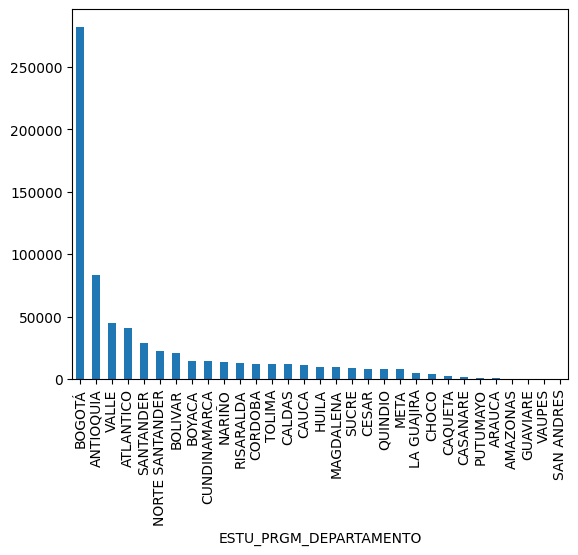

In [ ]:
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

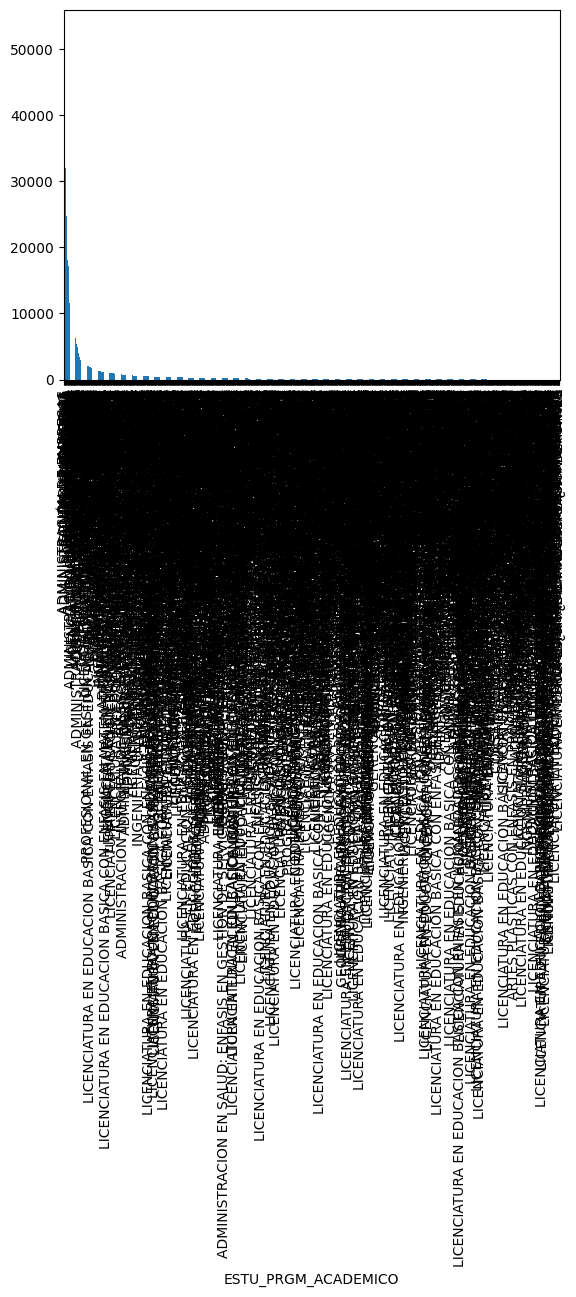

In [ ]:
z.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

## Inspect visually if these two columns have distinctive behaviour with respect to what we want to predict

Esploramos la informacion para ver que campos pueden ser utiles para el entrenamiento

In [29]:
print(z.ESTU_PRGM_ACADEMICO.unique())

AttributeError: 'DataFrame' object has no attribute 'ESTU_PRGM_ACADEMICO'

In [12]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_PRGM_ACADEMICO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_ACADEMICO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

AttributeError: 'DataFrame' object has no attribute 'ESTU_PRGM_ACADEMICO'

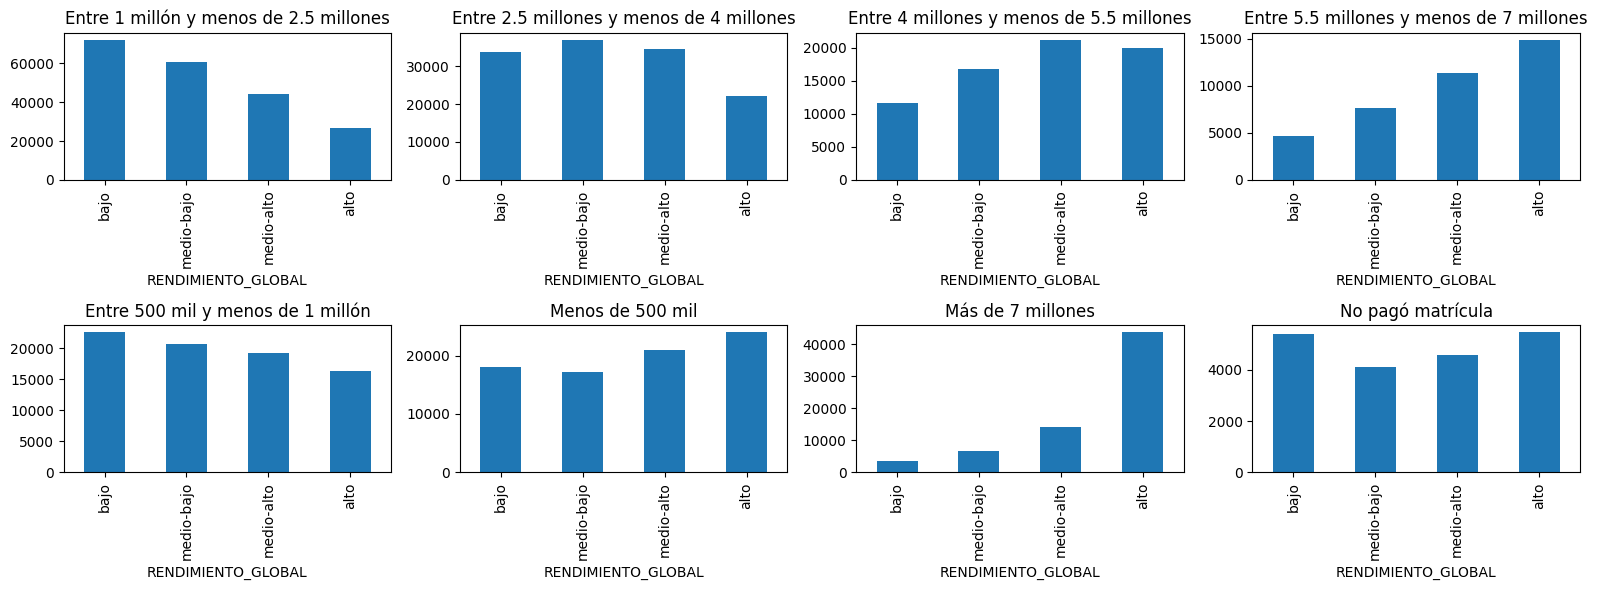

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

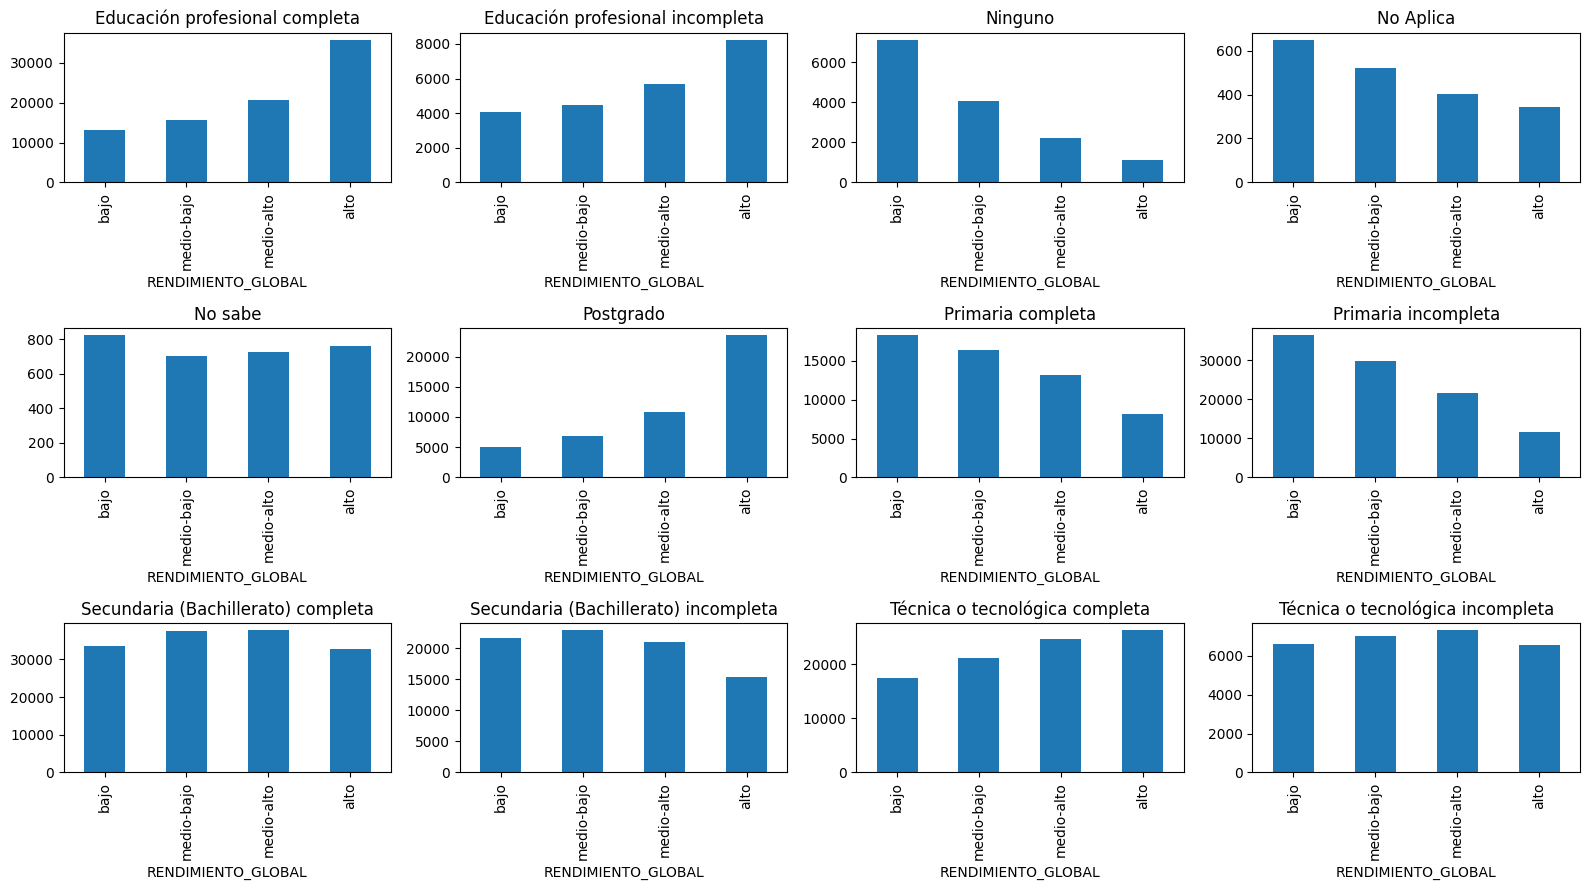

In [ ]:
c = sorted(z.FAMI_EDUCACIONMADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_EDUCACIONMADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

Quitar

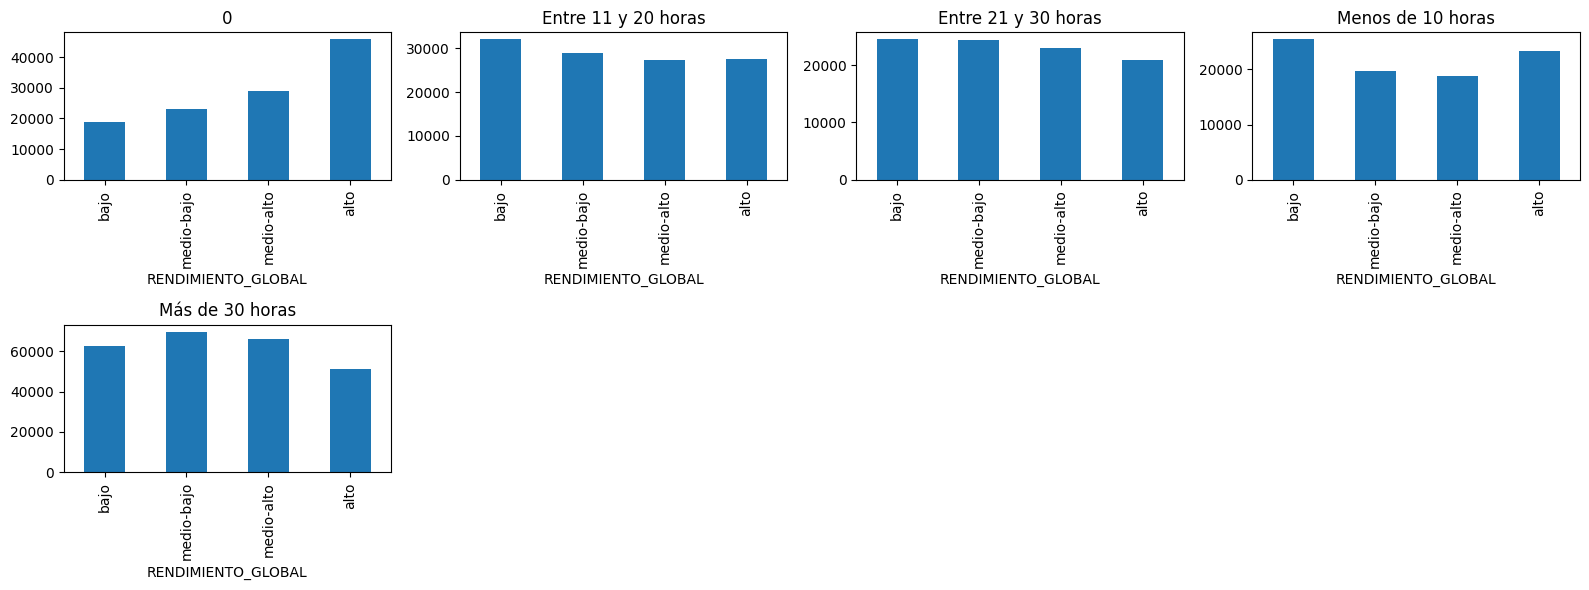

In [ ]:
 c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

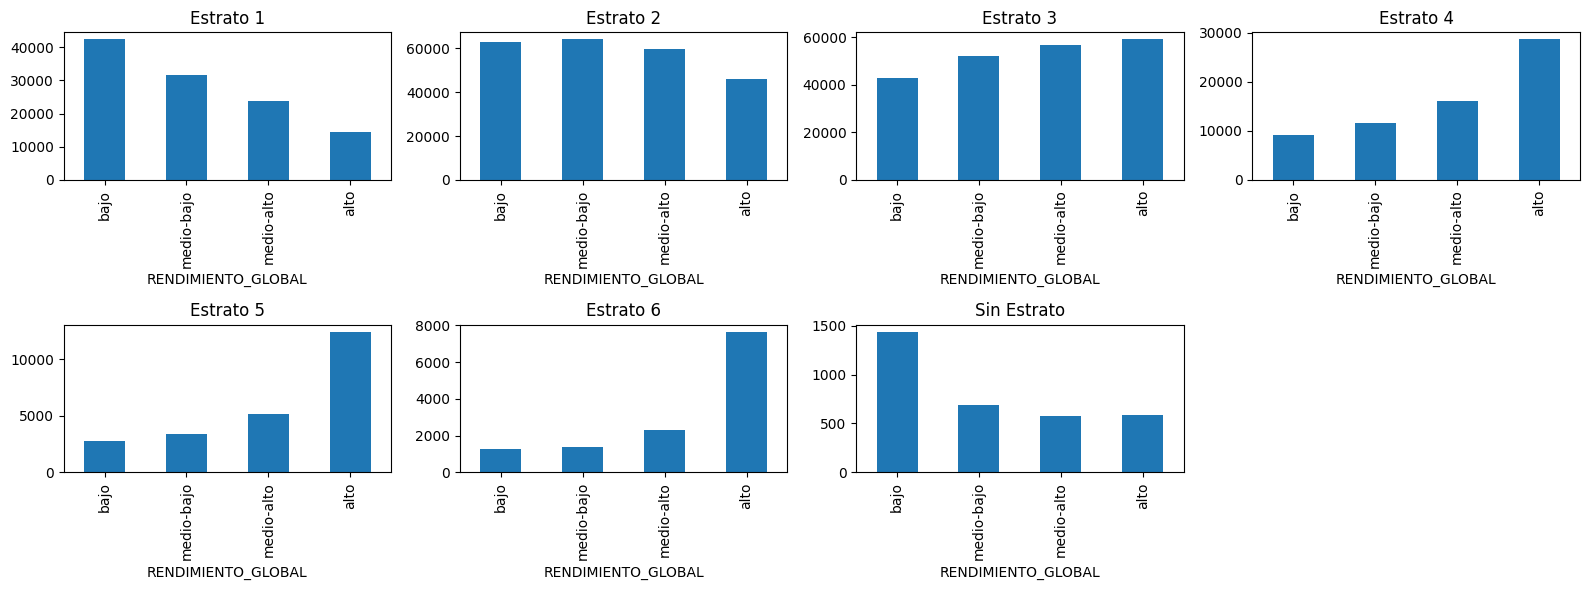

In [13]:
 c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

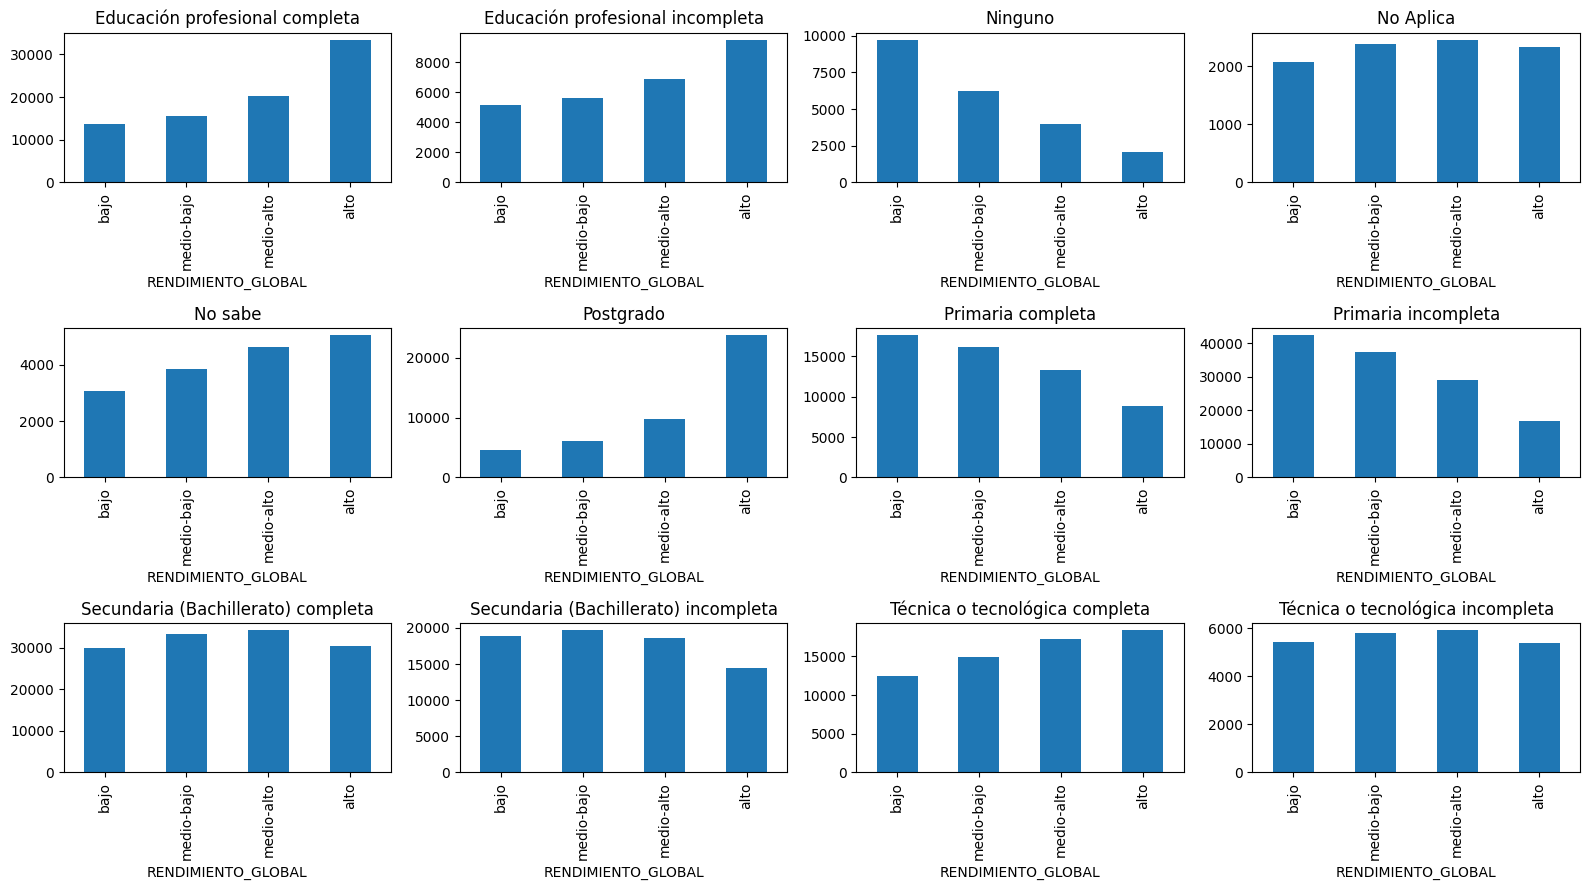

In [ ]:
 c = sorted(z.FAMI_EDUCACIONPADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_EDUCACIONPADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

quitar

KeyError: "['alto'] not in index"

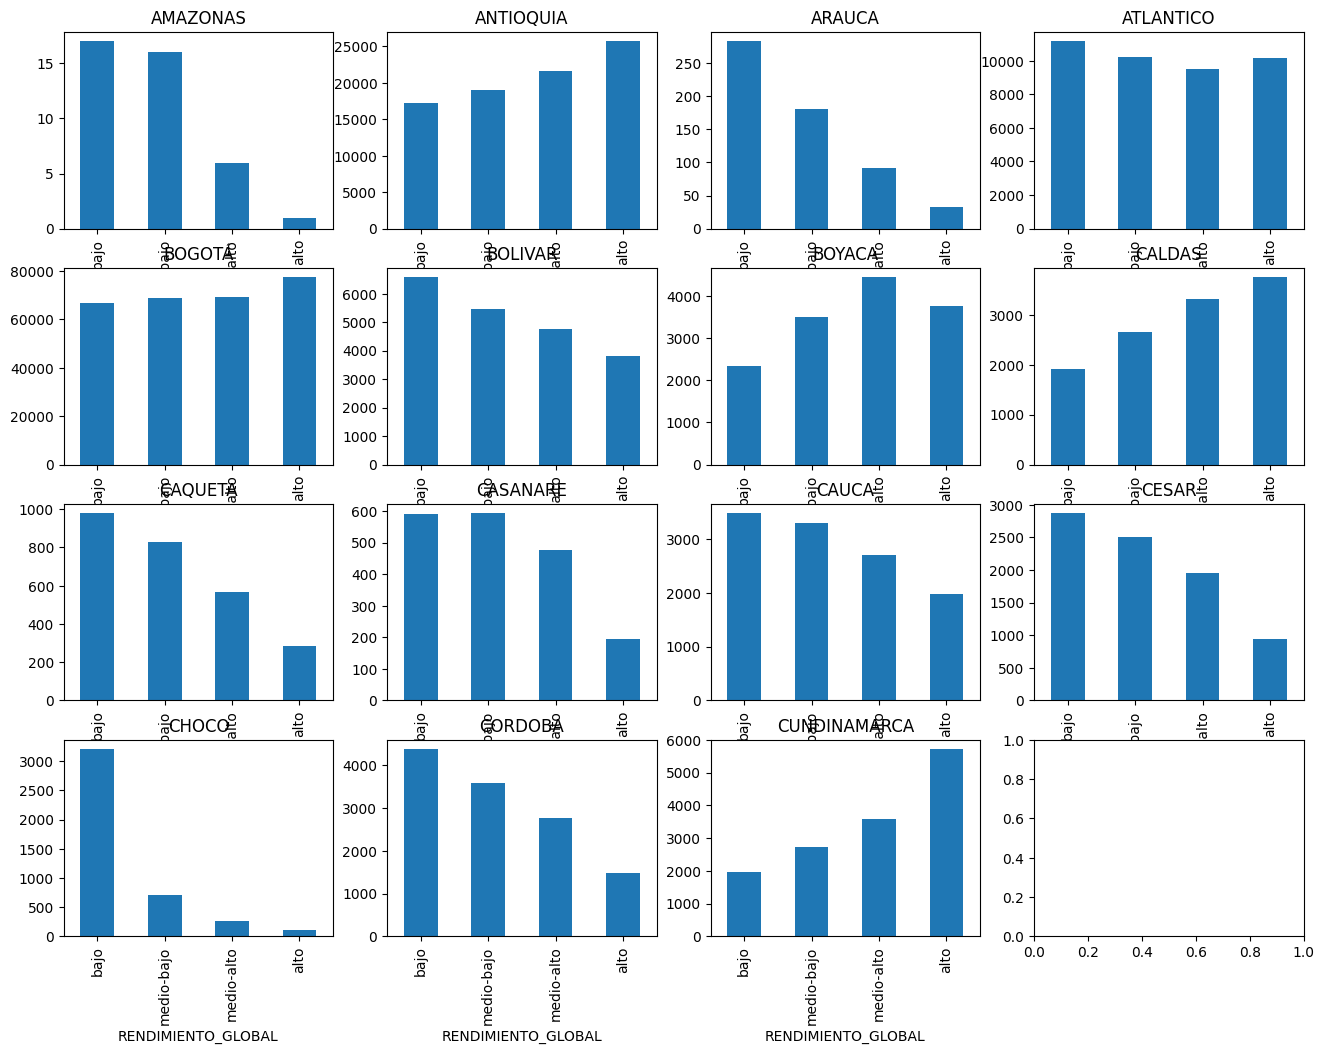

In [ ]:
 c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

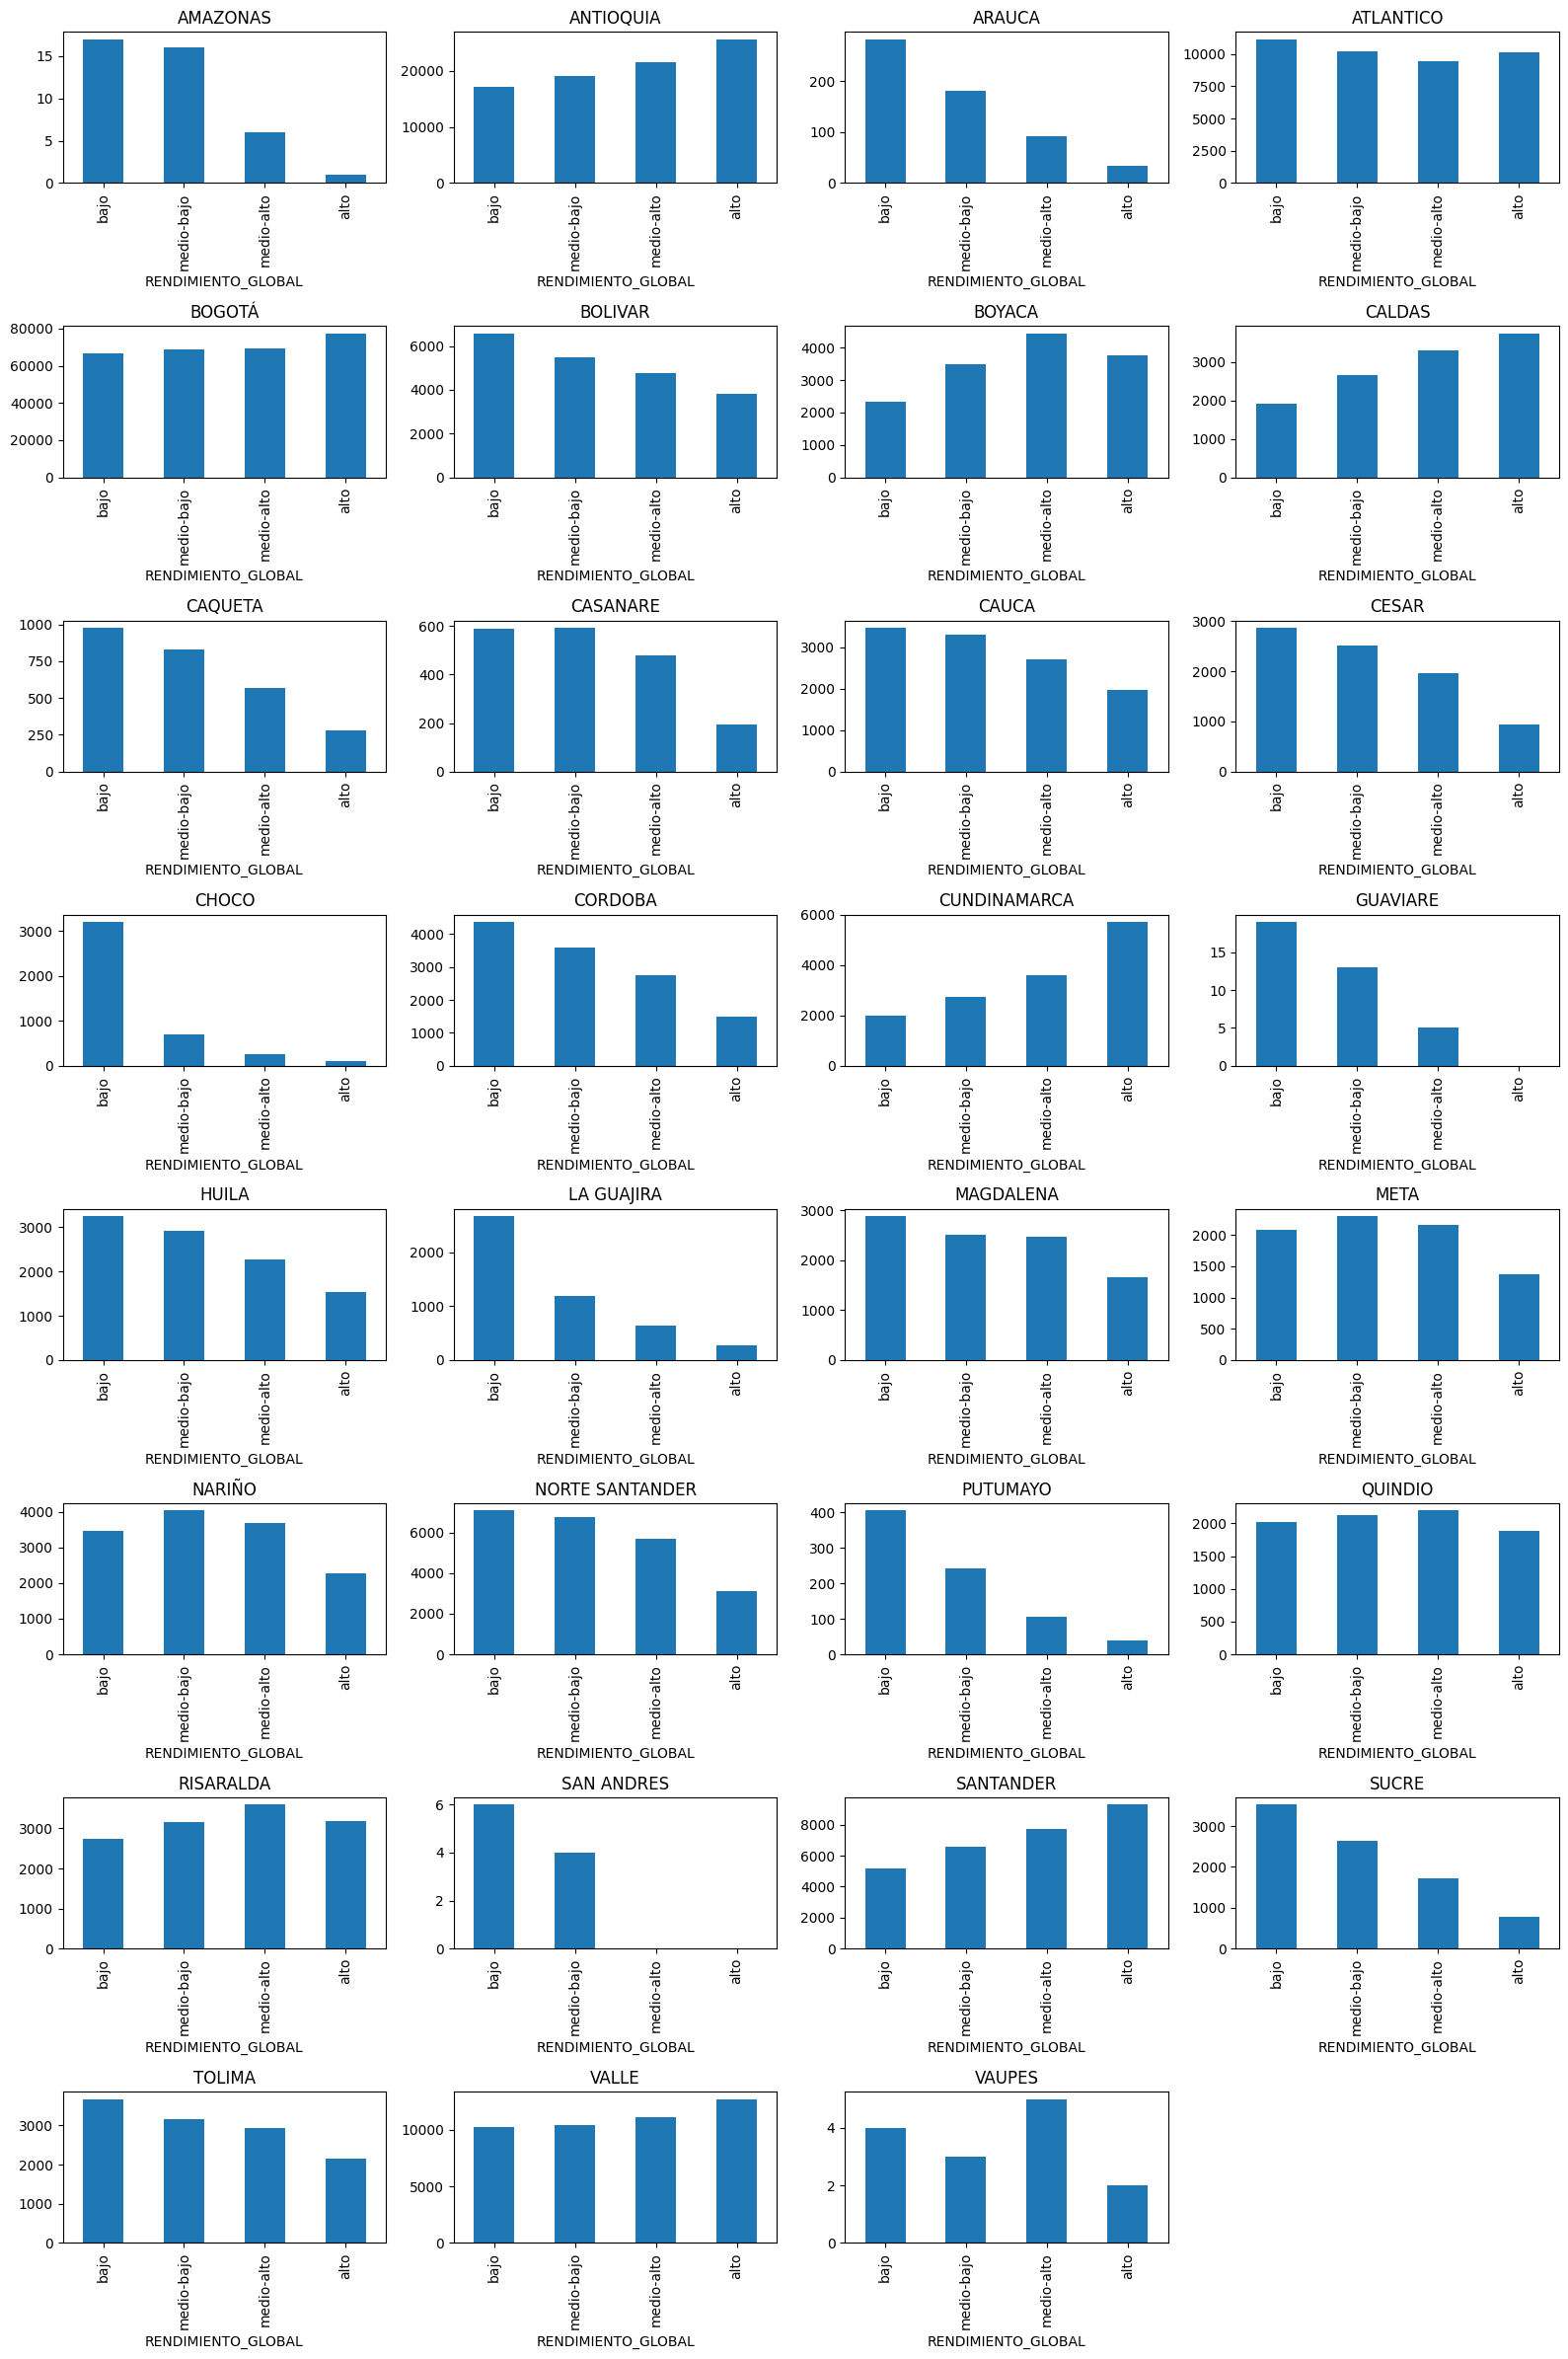

In [ ]:
c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax, ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO == ci]
    # Get the value counts for RENDIMIENTO_GLOBAL
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    # Reindex with all desired categories, filling missing values with 0
    counts = counts.reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax) # plot on the correct subplot
    plt.title(ci)

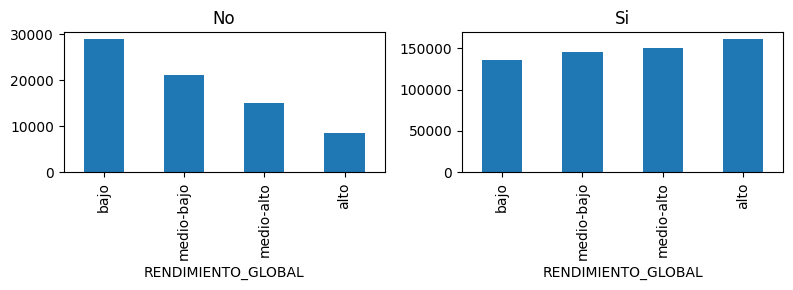

In [ ]:
 c = sorted(z.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_TIENEINTERNET==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

## Basic cleanup

considering that we have in total 692K data items, we have realatively few missing values on each column

ver que valores nulos hay por campo o que no tienen informacion

In [30]:
sum(z.FAMI_EDUCACIONMADRE.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.ESTU_HORASSEMANATRABAJA.isna()), sum(z.FAMI_TIENEINTERNET.isna()), sum(z.FAMI_EDUCACIONPADRE.isna()), sum(z.ESTU_PRGM_DEPARTAMENTO.isna())


(23664, 6287, 32137, 30857, 26629, 23178, 0)

In [ ]:
print(z.FAMI_EDUCACIONMADRE.unique())

['Postgrado' 'Técnica o tecnológica incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional incompleta' 'Educación profesional completa'
 'Primaria incompleta' nan 'Ninguno' 'No Aplica' 'No sabe']


we will substitute `nan` values with a preset symbol to mark them

### Cleaning `ESTU_VALORMATRICULAUNIVERSIDAD`

we convert `ESTU_VALORMATRICULAUNIVERSIDAD` to a **continuous** value since the ordering makes sense and we would like models to have a chance to capture it.

observe we assign `no info` to -1, which is somewhat artificial in this case

Se cambian esos valores nulos o faltos de informacion y se asigna el valor de 'no info'

In [31]:
z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'no info'
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'no info'
z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'no info'
z.ESTU_PRGM_DEPARTAMENTO.values[z.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info'

sum(z.FAMI_EDUCACIONMADRE.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.ESTU_HORASSEMANATRABAJA.isna()), sum(z.FAMI_TIENEINTERNET.isna()), sum(z.FAMI_EDUCACIONPADRE.isna()), sum(z.ESTU_PRGM_DEPARTAMENTO.isna())

(0, 0, 0, 0, 0, 0, 0)

FASE DE PREPROCESAMIENTO

asignar valores numericos a las columnas en este caso mediante un diccionario sacar el promedio por cada item

In [32]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.5,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

z.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z.ESTU_VALORMATRICULAUNIVERSIDAD]]
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.50,68014
6.25,38490
0.00,19528
-1.00,6287


### Cleaning `FAMI_EDUCACIONMADRE`

observe that for `FAMI_EDUCACIONMADRE` there could be many choices on how to deal with missing data

- leave it as it is
- unite `no info`, `No sabe` , `No Aplica` into a single symbol
- etc.

since there are not so many `No sabe`, `No aplica` probably they wont have much effect on the final result so we will unite them into a single value so that there are not so many columns in the one hot encoding


donde se digito no sabe o no aplica se asigna el valo de no info

In [17]:
z = z.copy()
z.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONMADRE.values]

In [18]:
z.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,28599
Técnica o tecnológica incompleta,27533


first we create the onehot mapping

se asigna valor de 0 o 1 a cada item segun sea el caso

In [33]:
x = z.FAMI_EDUCACIONMADRE.values
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
FAMI_EDUCACIONMADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'No Aplica': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'No sabe': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([

se aplica al dataset

agrupar

In [34]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Visualizar

In [35]:
FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
FAMI_EDUCACIONMADRE_df

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__No Aplica,FAMI_EDUCACIONMADRE__No sabe,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


and we assemble everything into a single dataframe, removing the original `FAMI_EDUCACIONMADRE` column.

we now have 13 columns ... why?


Visualizar cantidad de ficheros y numero de columnas

In [36]:
z = pd.concat([FAMI_EDUCACIONMADRE_df, z], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
z.shape

(692500, 20)

ahora visualizamos todos los campos

In [ ]:
z.head()

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOGOTÁ,Técnica o tecnológica incompleta,625000,Estrato 3,Menos de 10 horas,Si,medio-alto
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ATLANTICO,Técnica o tecnológica completa,3250000,Estrato 3,0,No,bajo
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BOGOTÁ,Secundaria (Bachillerato) completa,3250000,Estrato 3,Más de 30 horas,Si,bajo
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SANTANDER,No sabe,475000,Estrato 4,0,Si,alto
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ANTIOQUIA,Primaria completa,3250000,Estrato 3,Entre 21 y 30 horas,Si,medio-bajo


Horas semanas trabajadas

In [37]:
cmap = { 'Menos de 10 horas': 5.5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 65.5,
    '0': 0,
    'no info': -1}
z.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in z.ESTU_HORASSEMANATRABAJA]]
z.ESTU_HORASSEMANATRABAJA.value_counts()


,count
ESTU_HORASSEMANATRABAJA,
65.5,249352
0.0,116550
15.5,115857
25.5,92693
5.5,87191
-1.0,30857


Estrato

In [ ]:
print(z.FAMI_ESTRATOVIVIENDA.unique())

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'no info'
 'Estrato 6' 'Sin Estrato' 'Es']


In [38]:
cmap = { 'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0,
    'Es':0,
    'no info': -1}
z.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in z.FAMI_ESTRATOVIVIENDA]]
z.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,32137
5,23608
6,12605
0,3289


Internet

In [ ]:
print(z.FAMI_TIENEINTERNET.unique())

['Si' 'No' 'no info']


In [39]:
cmap = { 'Si': 1,
    'No': 0,
    'no info': -1}
z.FAMI_TIENEINTERNET = np.r_[[cmap[i] for i in z.FAMI_TIENEINTERNET]]
z.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,592514
0,73357
-1,26629


estudio del padre

In [40]:
z = z.copy()
z.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONPADRE.values]

In [41]:
z.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
no info,48999
Postgrado,44169
Educación profesional incompleta,27084


In [42]:
x = z.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [43]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
z = pd.concat([FAMI_EDUCACIONPADRE_df, z], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
z.shape

(692500, 30)

Departamentos

In [46]:
print(z.ESTU_PRGM_DEPARTAMENTO.unique())

['BOGOTÁ' 'ATLANTICO' 'SANTANDER' 'ANTIOQUIA' 'HUILA' 'SUCRE' 'CAQUETA'
 'CUNDINAMARCA' 'BOLIVAR' 'TOLIMA' 'VALLE' 'QUINDIO' 'RISARALDA' 'CORDOBA'
 'META' 'LA GUAJIRA' 'BOYACA' 'NARIÑO' 'CAUCA' 'NORTE SANTANDER' 'CESAR'
 'PUTUMAYO' 'CALDAS' 'MAGDALENA' 'CHOCO' 'CASANARE' 'ARAUCA' 'GUAVIARE'
 'AMAZONAS' 'VAUPES' 'SAN ANDRES']


In [47]:
z = z.copy()
z.ESTU_PRGM_DEPARTAMENTO = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.ESTU_PRGM_DEPARTAMENTO.values]

In [48]:
z.ESTU_PRGM_DEPARTAMENTO.value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [49]:
x = z.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i,val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}
ESTU_PRGM_DEPARTAMENTO_onehot_vals

{'AMAZONAS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ANTIOQUIA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARAUCA': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ATLANTICO': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOGOTÁ': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOLIVAR': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOYACA': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [50]:
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in z.ESTU_PRGM_DEPARTAMENTO]]
ESTU_PRGM_DEPARTAMENTO_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [51]:
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])
ESTU_PRGM_DEPARTAMENTO_df

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO__PUTUMAYO,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
z = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, z], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
z.shape

(692500, 60)

carrera

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que ya tienes tu DataFrame z
z = z.copy()

# Agrupar programas académicos
def agrupar_programas(programa):
    programa = programa.lower()
    if 'licenciatura' in programa:
        return 'Licenciaturas'
    elif 'ingeniería' in programa:
        return 'Ingenierías'
    else:
        return 'Otros'

z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].apply(agrupar_programas)

# Usar LabelEncoder para asignar un valor numérico a cada categoría
le = LabelEncoder()
z['ESTU_PRGM_ACADEMICO'] = le.fit_transform(z['ESTU_PRGM_ACADEMICO'])

# Verificar las categorías y los valores numéricos asignados
print(dict(zip(le.classes_, le.transform(le.classes_))))  # Muestra las categorías y su valor numérico
print(z[['ESTU_PRGM_ACADEMICO']].head())  # Verifica los primeros registros con el valor numérico

{'Ingenierías': 0, 'Licenciaturas': 1, 'Otros': 2}
   ESTU_PRGM_ACADEMICO
0                    2
1                    2
2                    2
3                    2
4                    2


In [ ]:
z = z.copy()
z.ESTU_PRGM_ACADEMICO = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.ESTU_PRGM_ACADEMICO.values]

In [ ]:
z.ESTU_PRGM_ACADEMICO.value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [ ]:
x = z.ESTU_PRGM_ACADEMICO.values
ESTU_PRGM_ACADEMICO_vals = sorted(np.unique(x))
ESTU_PRGM_ACADEMICO_onehot_vals = {val: np.eye(len(ESTU_PRGM_ACADEMICO_vals))[i] for i,val in enumerate(ESTU_PRGM_ACADEMICO_vals)}
ESTU_PRGM_ACADEMICO_onehot_vals

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ESTU_PRGM_ACADEMICO_onehot_enc = np.r_[[ESTU_PRGM_ACADEMICO_onehot_vals[i] for i in z.ESTU_PRGM_ACADEMICO]]
ESTU_PRGM_ACADEMICO_onehot_enc

In [ ]:
ESTU_PRGM_ACADEMICO_df = pd.DataFrame(ESTU_PRGM_ACADEMICO_onehot_enc, columns=[f"ESTU_PRGM_ACADEMICO{v}" for v in ESTU_PRGM_ACADEMICO_onehot_vals])
ESTU_PRGM_ACADEMICO_df

,ESTU_PRGM_ACADEMICOIngenierías,ESTU_PRGM_ACADEMICOLicenciaturas,ESTU_PRGM_ACADEMICOOtros
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
692495,0.0,0.0,1.0
692496,0.0,0.0,1.0
692497,0.0,0.0,1.0
692498,0.0,0.0,1.0


In [ ]:
z.head()

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.25,3,5.5,1,medio-alto
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.25,3,0.0,0,bajo
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.25,3,65.5,1,bajo
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.75,4,0.0,1,alto
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.25,3,25.5,1,medio-bajo


## convert target (prediction) column into discrete values

now everything in our dataset is **numeric**!!!

convertir a numeros el campo rendimiento global

In [53]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.25,3,5.5,1,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.25,3,0.0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.25,3,65.5,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.75,4,0.0,1,3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.25,3,25.5,1,1


## build `X` and `y` for training a model

observe we sort columns to make sure we always get the same ordering

Genero una matriz y separo el rendimiento global le asigno la variable y y todas las demas columnas les asigno la x

In [54]:
z = z[sorted(z.columns)]

X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape

((692500, 59), (692500,))

## split into train and test

In [55]:
from sklearn.model_selection import train_test_split

Divido la informacion entre lo entrenado y lo que usare para la prueba

In [56]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 59), (138500, 59), (554000,), (138500,))

## Make a linear model for classification

train model

entrenar el modelo , en la variable lr quedara el modelo ya entrenado

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

get predictions

Genera predicciones

In [58]:
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

Observo que tenga la misma cantidad de ficheros(informacion)

In [59]:
preds_tr.shape, preds_ts.shape

((554000,), (138500,))

In [60]:
print (preds_tr[:10])
print (preds_ts[:10])

[3 0 3 2 0 1 3 0 2 2]
[3 1 3 0 3 3 0 0 3 3]


In [61]:
yts [:10]

array([3, 1, 2, 1, 2, 2, 0, 2, 3, 1])

get accuracy and confusion matrices

vemos en promedio la cantidad de acierto

In [62]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.36438628158844766, 0.36412996389891694)

In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

# Asegurarte de que las columnas están en el orden adecuado
z = z[sorted(z.columns)]

In [64]:
X = z[[c for c in z.columns if c != y_col]].values
y = z[y_col].values

In [65]:
print(X.shape, y.shape)

(692500, 59) (692500,)


In [66]:
# Dividir en conjunto de entrenamiento y prueba (80% para entrenar)
Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=0.8, random_state=42)

In [67]:
# Verificar las formas de los datos divididos
print(Xtr.shape, Xts.shape, ytr.shape, yts.shape)

(554000, 59) (138500, 59) (554000,) (138500,)


In [68]:
# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Usar softmax para clasificación multiclase (puedes cambiar a 'binary:logistic' si es binaria)
    eval_metric='mlogloss',     # Función de evaluación (log loss en este caso para clasificación)
    use_label_encoder=False,    # Evitar advertencias de codificación de etiquetas
    random_state=42             # Semilla para reproducibilidad
)

In [69]:
# Entrenar el modelo XGBoost
xgb_model.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:08:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [70]:
# Predecir en el conjunto de entrenamiento y prueba
preds_tr = xgb_model.predict(Xtr)
preds_ts = xgb_model.predict(Xts)

In [71]:
# Verificar las formas de las predicciones
print(preds_tr.shape, preds_ts.shape)

(554000,) (138500,)


In [72]:
# Evaluar la precisión en el conjunto de entrenamiento y prueba
accuracy_tr = np.mean(preds_tr == ytr)
accuracy_ts = np.mean(preds_ts == yts)

In [73]:
print(f"Precisión en entrenamiento: {accuracy_tr}")
print(f"Precisión en prueba: {accuracy_ts}")

Precisión en entrenamiento: 0.4206534296028881
Precisión en prueba: 0.4064476534296029


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

observe how each row in the confusion matrix adds up to 1. What does this mean?

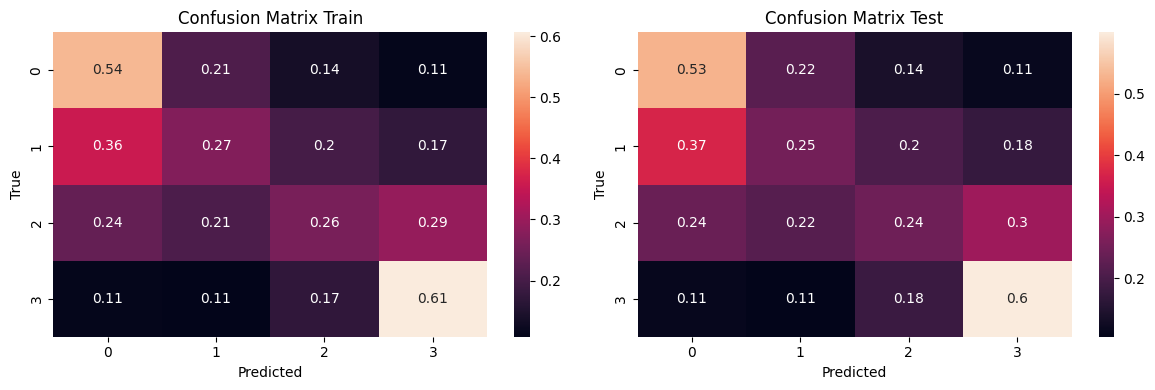

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Mostrar la matriz de confusión para el conjunto de entrenamiento
sns.heatmap(cm_tr, annot=True, ax=axes[0])
axes[0].set_title("Confusion Matrix Train")
axes[0].set_ylabel("True")
axes[0].set_xlabel("Predicted")

# Mostrar la matriz de confusión para el conjunto de prueba
sns.heatmap(cm_ts, annot=True, ax=axes[1])
axes[1].set_title("Confusion Matrix Test")
axes[1].set_ylabel("True")
axes[1].set_xlabel("Predicted")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

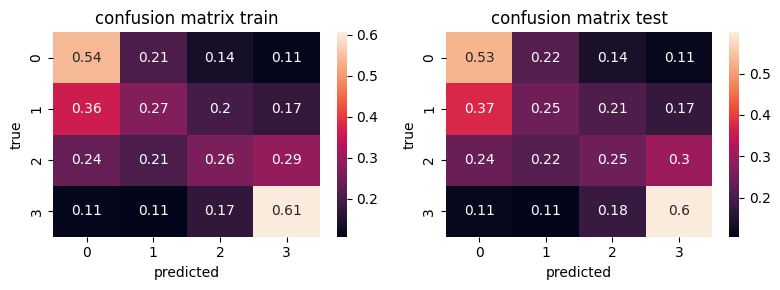

In [ ]:
import matplotlib.pyplot as plt
from rlxutils import subplots
import seaborn as sns

for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

## is the column `FAMI_EDUCACIONMADRE` really contributing?

remove it and compare scores

quitamos las demas columnas y dejamos solo la columna valor matricula para ver su comportamiento

In [ ]:
zh = z[['ESTU_VALORMATRICULAUNIVERSIDAD', y_col]]

X = zh[[c for c in zh.columns if c!=y_col]].values
y = zh[y_col].values
X.shape, y.shape

((692500, 1), (692500,))

divido entre entrenamiento y el test, lo entrenamos y lo llamamos diferente en caso de necesitarlo a futuro

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
lr_small = LogisticRegression()
lr_small.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
preds_tr = lr_small.predict(Xtr)
preds_ts = lr_small.predict(Xts)
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3644819494584838, 0.36370397111913355)

where is it helping?

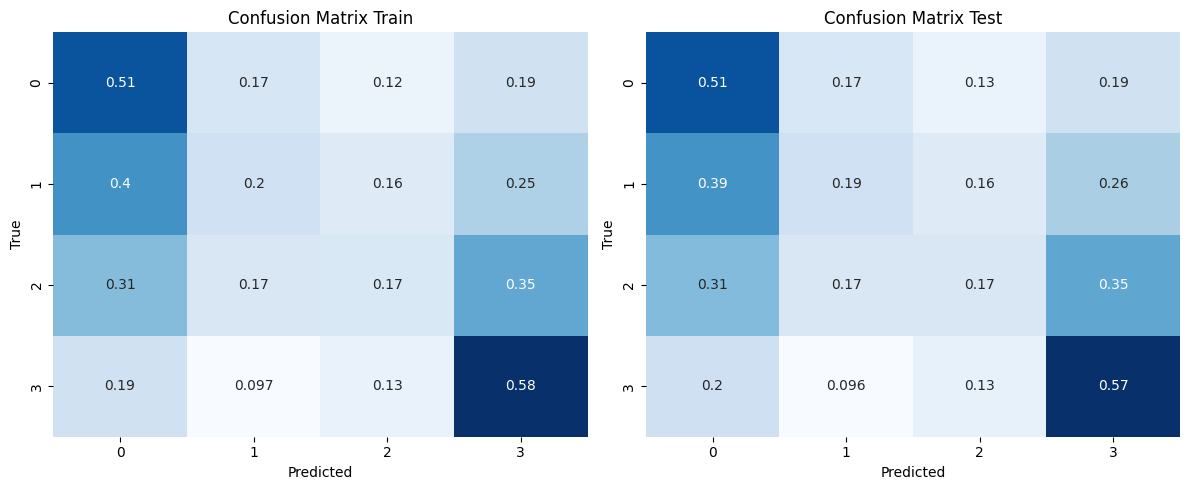

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes ytr, preds_tr, yts, preds_ts definidos

# Calcular las matrices de confusión
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por clase
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1, 1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1, 1)

# Crear las subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Mostrar la matriz de confusión para el conjunto de entrenamiento
sns.heatmap(cm_tr, annot=True, ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title("Confusion Matrix Train")
axes[0].set_ylabel("True")
axes[0].set_xlabel("Predicted")

# Mostrar la matriz de confusión para el conjunto de prueba
sns.heatmap(cm_ts, annot=True, ax=axes[1], cmap='Blues', cbar=False)
axes[1].set_title("Confusion Matrix Test")
axes[1].set_ylabel("True")
axes[1].set_xlabel("Predicted")

# Ajustar la disposición de la figura
plt.tight_layout()
plt.show()

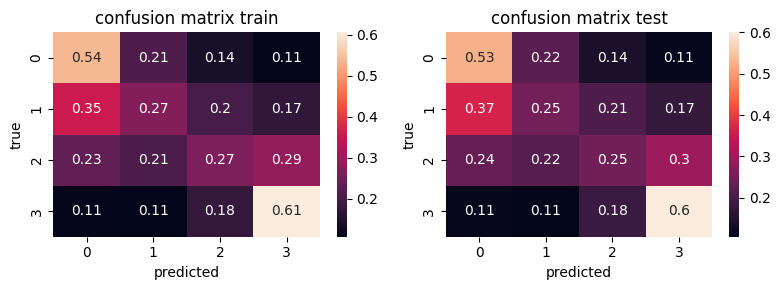

In [ ]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

## We keep the first model, now we apply the same procedure to `test.csv`

observe:
- there is no `RENDIMIENTO_GLOBAL` column
- we must keep the IDs so that we can create properly the submission file

cargar en memoria el fichero de test

In [ ]:
zt = pd.read_csv("test.csv")
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [ ]:
zt_ids = zt['ID'].values
zt = zt[['ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE','ESTU_VALORMATRICULAUNIVERSIDAD','FAMI_ESTRATOVIVIENDA','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 7)


,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET
0,BOLIVAR,Primaria completa,Técnica o tecnológica completa,Menos de 500 mil,Estrato 3,Menos de 10 horas,Si
1,ANTIOQUIA,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,Estrato 2,Entre 21 y 30 horas,Si
2,BOGOTÁ,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Entre 1 millón y menos de 2.5 millones,Estrato 3,0,Si
3,SUCRE,Primaria incompleta,Primaria incompleta,Entre 1 millón y menos de 2.5 millones,Estrato 1,Entre 21 y 30 horas,No
4,ATLANTICO,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,Estrato 2,Entre 11 y 20 horas,Si


In [ ]:
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
zt.ESTU_VALORMATRICULAUNIVERSIDAD.values[zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
zt.FAMI_TIENEINTERNET.values[zt.FAMI_TIENEINTERNET.isna()] = 'no info'
zt.FAMI_EDUCACIONPADRE.values[zt.FAMI_EDUCACIONPADRE.isna()] = 'no info'
zt.ESTU_PRGM_DEPARTAMENTO.values[zt.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info'
zt.FAMI_EDUCACIONMADRE.values[zt.FAMI_EDUCACIONMADRE.isna()] = 'no info'

mapeo valor del estrato

In [ ]:
cmap = { 'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0,
    'no info': -1}
zt = zt.copy()
zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]

In [ ]:
cmap = { 'Menos de 10 horas': 5.5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 65.5,
    '0': 0,
    'no info': -1}
zt = zt.copy()
zt.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.ESTU_HORASSEMANATRABAJA]]

In [ ]:
cmap = { 'Si': 1,
    'No': 0,
    'no info': -1}
zt = zt.copy()
zt.FAMI_TIENEINTERNET = np.r_[[cmap[i] for i in zt.FAMI_TIENEINTERNET]]

In [ ]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.750000,
 'Entre 2.5 millones y menos de 4 millones': 3.250000,
 'Menos de 500 mil': .250000,
 'Entre 500 mil y menos de 1 millón': .750000,
 'Entre 4 millones y menos de 5.5 millones': 4.75000,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25000,
 'No pagó matrícula': 0,
 'no info': -1}
zt = zt.copy()
zt.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in zt.ESTU_VALORMATRICULAUNIVERSIDAD]]

In [ ]:
zt.ESTU_PRGM_DEPARTAMENTO = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.ESTU_PRGM_DEPARTAMENTO.values]
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in zt.ESTU_PRGM_DEPARTAMENTO]]
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])
zt = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, zt], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
zt.shape

(296786, 37)

In [ ]:
zt.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.FAMI_EDUCACIONPADRE.values]
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in zt.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
zt = pd.concat([FAMI_EDUCACIONPADRE_df, zt], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
zt.shape

(296786, 47)

In [ ]:
zt.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.FAMI_EDUCACIONMADRE.values]
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in zt.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
zt = pd.concat([FAMI_EDUCACIONMADRE_df, zt], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
zt.shape

(296786, 57)

In [ ]:
zt.ESTU_PRGM_ACADEMICO = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.ESTU_PRGM_ACADEMICO.values]
ESTU_PRGM_ACADEMICO_onehot_enc = np.r_[[ESTU_PRGM_ACADEMICO_onehot_vals[i] for i in zt.ESTU_PRGM_ACADEMICO]]
ESTU_PRGM_ACADEMICO_df = pd.DataFrame(ESTU_PRGM_ACADEMICO_onehot_enc, columns=[f"ESTU_PRGM_ACADEMICO__{v}" for v in ESTU_PRGM_ACADEMICO_onehot_vals])
zt = pd.concat([ESTU_PRGM_ACADEMICO_df, zt], axis=1).drop('ESTU_PRGM_ACADEMICO', axis=1)
zt.shape

NameError: name 'ESTU_PRGM_ACADEMICO_onehot_vals' is not defined

In [ ]:
zt

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,...,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,3,5.5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.25,2,25.5,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.75,3,0.0,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.75,1,25.5,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.25,2,15.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.25,1,65.5,1
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.75,4,0.0,1
296783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.25,3,65.5,1
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.25,3,15.5,1


create `X` array and predict

generamos el x test data

In [ ]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 57)

usamos el primer modelo para generar las predicciones

In [ ]:
preds_test_data = lr.predict(X_test_data)

In [ ]:
preds_test_data = xgb_model.predict(X_test_data)

In [ ]:
preds_test_data.shape

(296786,)

## prepare submission

first, map back the predictions to textual values

restauramos nuestro campo rendimiento global y lo asociamos al ID
mapeo inverso

In [ ]:
# inverse mapping
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [ ]:
# create dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,medio-bajo
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,bajo
296783,239074,medio-alto
296784,963852,alto


Grabamos el fichero

In [ ]:
# save to file ready to submit
submission.to_csv("my_submission.csv", index=False)

visualizamos

In [ ]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-alto
499179,medio-bajo
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
submission.shape

(296786, 2)

## Send your submission to Kaggle

You must **join the competition** first

In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "Laura Natalia Gonzalez submission with linear model"

100% 4.03M/4.03M [00:00<00:00, 5.29MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia

## Things you can try

- other models (svm, random forest, gaussian, etc.)
- different parameters in the models (like `gamma` for svm, or `max_depth` for random forests). see the doc of each model in `sklearn`.
- use different preprocessing and cleaning methods for different columns
- create new columns manually, for instance,
    - group `ESTU_PRGM_ACADEMICO` into areas of knowlege (engineering, social sciences, etc.)
    - do some operation between columns (multiply, concatenate, etc.)
- integrate external data as new columns, for instance, economic data from each department in Colombia, for each different year, etc.
